<a href="https://colab.research.google.com/github/johanhoffman/DD2363_VT23/blob/main/Lab4/reinisfreibergs_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: integration
**Reinis Freibergs**

# **Abstract**

In this lab assignment the goal is to implement various numerical integration methods, including the 2-point Gauss quadrature over unit interval, 3-point edge midpoint Gauss quadrature over a reference triangle, Monte Carlo quadrature over a unit interval and finally an application of the 3-point Gauss quadrature for approximation.
All methods were tested against random polynomials and returned the expected results.


# **About the code**

In [152]:
"""This program is a template for lab reports in the course"""
"""DD2363 Methods in Scientific Computing, """
"""KTH Royal Institute of Technology, Stockholm, Sweden."""


# Author: Reinis Freibergs, 2023

# Based on a template:
# Copyright (C) 2023 Johan Hoffman (jhoffman@kth.se)


# This file is part of the course DD2363 Methods in Scientific Computing
# KTH Royal Institute of Technology, Stockholm, Sweden
#
# This is free software: you can redistribute it and/or modify
# it under the terms of the GNU Lesser General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.

# This template is maintained by Johan Hoffman
# Please report problems to jhoffman@kth.se

'KTH Royal Institute of Technology, Stockholm, Sweden.'

# **Set up environment**

To have access to the neccessary modules you have to run this cell. If you need additional modules, this is where you add them. 

In [153]:
# Load neccessary modules.
#from google.colab import files

import numpy as np
import matplotlib.pyplot as plt

# **Introduction**

Methods below explore how to calculate integrals numerically over some interval or a triangle.
The Gauss quadrature allows to derive a method which gives exact results for polynomials up to degree $2q+1$ by using $q+1$ quadrature points. Equation 11.4 describes how to calculate the quadrature points and weights:

$$\int_a^b \varphi_i(x) \ dx = \sum_{j=0}^q \varphi_i(x_j) \ \omega_j,  \quad i = 0,...,2q+1 $$

where $\{ \varphi_j(x)\}_{i=0}^{2q+1} = \sum_{i=0}^{2q+1}c_ix^i
$ is the polynomial basis.

Another method is the Monte Carlo integration, where the integral is calculated by sampling random points from the domain of integration.

# **Methods**

## 2-point Gauss quadrature over a unit interval 

There are two ways how to approach this problem. Either calculate the values directly as:

$$\int_0^1 p(x) dx = p(x_0) \omega_0 + p(x_1) \omega_1$$

Or use a mapping function and use the values from the interval [-1,1], which can be easily found in various resources precomputed.

$$\int_\Omega f(x) dx = \int_{\hat{\Omega}} f(F(\hat{x})) \vert det(F') \vert d\hat{x} \approx \vert det(F') \vert  \sum_{i=0}^q f(F(\hat{x}))\omega_i$$

Where the $F'$ is the Jacobian, which is constant for an affine map.
So for our case:

$$\int_0^1 f(x) dx = \frac{1}{2} \sum_{i=0}^1 f(\frac{\hat{x}+1}{2}) \omega_i$$

Meaning that we can take the precalculated weights and quadrature points (given in example 11.3) and calculate the transformed ones for the unit interval:

$$x_0 = \frac{\hat{x_0}+1}{2} = \frac{1/\sqrt{3} + 1}{2} = \frac{1}{2\sqrt 3} + \frac{1}{2} \approx 0.789$$

$$x_1 = \frac{\hat{x_1}+1}{2} = \frac{-1/\sqrt{3} + 1}{2} = -\frac{1}{2\sqrt 3} + \frac{1}{2} \approx 0.211$$

$$\omega_0 = \omega_1 = \frac{\hat{\omega}}{2} = \frac{1}{2}$$

Giving the rule:

$$\int_0^1 f(x) dx = \frac{f(\frac{1}{2\sqrt 3} + \frac{1}{2})}{2} + \frac{f)(-\frac{1}{2\sqrt 3} + \frac{1}{2})}{2}$$


In [154]:
def gauss_2p_integral(f):
    
    x_0 = 1/(2*np.sqrt(3)) + 1/2
    x_1 = -1/(2*np.sqrt(3)) + 1/2
    
    return 0.5*f(x_0) + 0.5*f(x_1)

## 3-point edge midpoint quadrature over a reference triangle

The calculation of this quadrature rule follows similar structure as the previous point, but instead of using single integral over a 1D function a double integral over an area needs to be considered.

As defined in example 11.4, the reference triangle is given by vertices $(0,0), (1,0), (0,1)$ 

The weight values and coordinates are given as $\omega_1 = \omega_2 = \omega_3 = \frac{1}{6}$ and $p_1 = [0, 0.5], p_2 = [0.5, 0], p_3 = [0.5, 0.5]$. 

The result is then $\int_D f(x) = f(p_1)\cdot\omega_1 + f(p_2)\cdot\omega_2 + f(p_3)\cdot\omega_3  = (f(p_1) + f(p_2) + f(p_3))\omega$

In [155]:
def triangle_3pt_mid_quadrature_integral(f):
    omega = 1/6
    midpoints = np.array([[0, 0.5],
                 [0.5, 0],
                 [0.5, 0.5]])
    
    integral = np.sum(f(midpoints)*omega)
    
    return integral
    

## Monte Carlo quadrature over a unit interval

The integral is calculated by sampling random points from the domain of integration. At large numbers of samples $n$ the approximation given in 12.3 holds:

$$\int_D g(x) dx \approx \frac{\vert D \vert}{n} \sum_{i=1}^n g(x_i)$$

Essentially giving a 1-point quadrature rule based on random sampling. Since in this case the unit interval is used the value $\vert D \vert = 1$

In [156]:
def MC_integral(f, n, test_solution=None):
    
    sum_n = 0
    values = []
    for i in range(n):
        point = np.random.uniform(low=0, high=1)
        sum_n += f(point)
        
        if test_solution:
            values.append( abs((sum_n / (i+1) - test_solution) ))
        
    return ((sum_n / n), values)

## Quadrature rule for L2 projection to pointwise linear approximation

The previous lab exercise considered L2 projection to find piecewise linear approximation of some function over mesh in 1D. It also involved a function with numerical integration - then the trapezoidal rule was used, and it raised a question how much a better integration rule would improve the approximation, since the trapezoidal rule gives exact results only for polynomials up to order 1. 

The implementation of the Gauss quadrature is described already in the first task. Using an arbitrary interval $[a, b]$ the rule can be generalised as:

$$\int_a^b f(x) dx \approx \frac{b-a}{2} \sum_{i=1}^{n}f(\frac{b-a}{2} \hat{x} + \frac{a+b}{2}) \omega_i$$

In this case 3 point Gauss quadrature will be used, since its exact for polynomials up to fifth order. The weights and quadrature points of the $[-1,1]$ interval can be taken from the wikipedia page https://en.wikipedia.org/wiki/Gaussian_quadrature

In [157]:
def gauss_3p_integral(f, a, b):
    
    points_orig = np.array([-np.sqrt(3/5), 0, np.sqrt(3/5)])
    weights_orig = np.array([5/9, 8/9, 5/9])
    
    point_vec = (b-a)/2 * points_orig + (a+b)/2
    weight_vec = (b-a)/2 * weights_orig
    
    return np.sum(f(point_vec) * weight_vec)

## Results

### 2-point Gauss quadrature over a unit interval 

The function is tested for cubic polynomials - so the results are expected to be exact . The Gauss integral value can be checked against exact integration, given by:

$$\int_0^1 ax^3 + bx^2 + cx + d = \frac{a}{4} + \frac{b}{3} + \frac{c}{2} + d$$

A correct implementation would require the difference between the quadrature rule and exact integral to be zero, which is checked by testing multiple random polynomials and printing out the differences.

In [158]:
def poly(coefs):
    a, b, c, d = coefs[0], coefs[1], coefs[2], coefs[3]
    def func(x):
        return a*x**3 + b*x**2 + c*x + d
    
    analytical_solution = a/4 + b/3 + c/2 + d
    
    return func, analytical_solution

for _ in range(5):
    coefs = np.random.uniform(low=-5, high=5, size=4)
    polynomial, exact_sol = poly(coefs)
    gauss_integral = gauss_2p_integral(polynomial)
    exact_integral = exact_sol
    print(gauss_integral - exact_integral)

0.0
0.0
5.551115123125783e-17
0.0
0.0


### 3-point edge midpoint quadrature over a reference triangle

Verification is done with the polynomial $ax^2 + by^2 + cxy + dx + ey + f$ with random coefficients, aside from that the procedure is the same as in last point.

In [159]:
def poly(coefs):
    a, b, c, d, e, f = coefs[0], coefs[1], coefs[2], coefs[3], coefs[4], coefs[5]
    def func(var):
        x, y = var[:, 0], var[:, 1]
        return a*x**2 + b*y**2 + c*x*y + d*x + e*y + f

    analytical_solution = (2*a + 2*b + c + 4*d + 4*e + 12*f) / 24

    return func, analytical_solution

for _ in range(5):
    coefs = np.random.uniform(low=-5, high=5, size=6)
    polynomial, exact_sol = poly(coefs)
    gauss_integral = triangle_3pt_mid_quadrature_integral(polynomial)
    exact_integral = exact_sol
    print(gauss_integral - exact_integral)

4.440892098500626e-16
1.1102230246251565e-16
-2.220446049250313e-16
-2.220446049250313e-16
0.0


### Monte Carlo quadrature over a unit interval

The testing procedure again is largely the same with random polynomials $ax^3 + bx^2 + cx + d$.
The only difference is that the residuals are plotted in the end and compared with the theoretical convergence rate $\frac{1}{\sqrt{n}}$ 


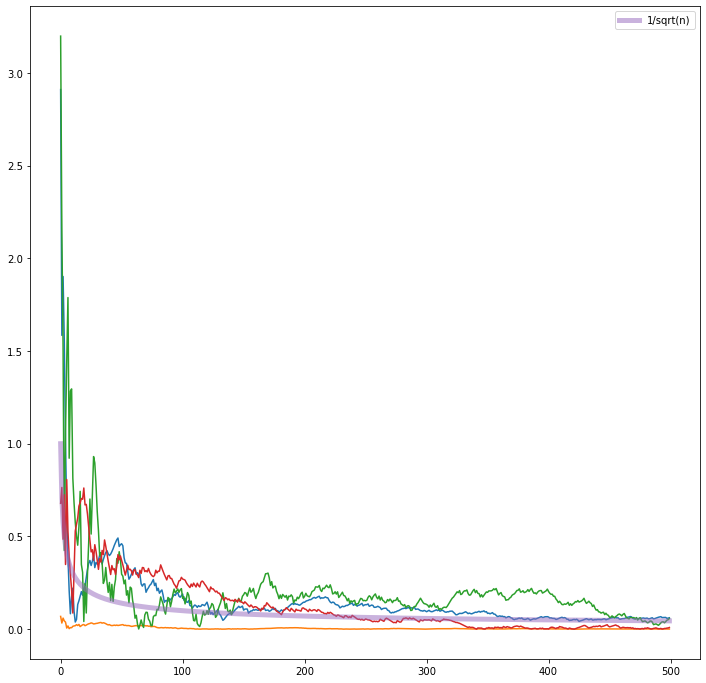

In [160]:
def poly(coefs):
    a, b, c, d = coefs[0], coefs[1], coefs[2], coefs[3]
    def func(x):
        return a*x**3 + b*x**2 + c*x + d
    
    analytical_solution = a/4 + b/3 + c/2 + d
    
    return func, analytical_solution

plt.figure(figsize=(12,12))
for _ in range(4):
    coefs = np.random.uniform(low=-5, high=5, size=4)
    polynomial, exact_sol = poly(coefs)
    
    exact_integral = exact_sol

    n = 500
    mc_integral, values = MC_integral(polynomial, n, exact_integral)
        
    plt.plot(values)


plt.plot(1/np.sqrt(np.linspace(1, n, n)), linewidth=5, alpha=0.5, label='1/sqrt(n)')
plt.legend()

### Quadrature rule for L2 projection to pointwise linear approximation

First the implementation of the quadrature rule is tested, as now it is a generalised version of the one used on the first part. The testing method is the same by using the fifth order polynomial $ax^5 + bx^4 + cx^3 + dx^2 + ex + f$, for whom the integral is expected to be exact.

In [161]:
def poly(coefs):
    a, b, c, d, e, f = coefs[0], coefs[1], coefs[2], coefs[3], coefs[4], coefs[5]
    
    def func(x):
        return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f
    
    analytical_solution = f + d/3 + c/4 + b/5 + a/6 + e/2
    
    return func, analytical_solution

for _ in range(5):
    coefs = np.random.uniform(low=-5, high=5, size=6)
    polynomial, exact_sol = poly(coefs)
    gauss_integral = gauss_3p_integral(polynomial, 0, 1)
    exact_integral = exact_sol
    print(gauss_integral - exact_integral)

0.0
-6.661338147750939e-16
0.0
0.0
0.0


The implementation and testing method for the approximation is taken directly from previous lab, with the quadrature integration rule implemented in the function below. 

In [162]:
def integrate_vector(f, i, points, loc2glob, is_trap=False):
    a, b = loc2glob[0], loc2glob[1]
    h = abs(points[b] - points[a])

    if i == 0:
        if is_trap:
            return f(points[a]) * h/2
        else:
            g = lambda x: f(x) * (points[b] - x) / h
            return gauss_3p_integral(g, points[a], points[b])
    else:
        if is_trap:
            return f(points[b]) * h/2
        else:
            g = lambda x: f(x) * (x - points[a]) / h
            return gauss_3p_integral(g, points[a], points[b])


Again the testing is exactly the same as in previous lab - it involves multiple order polynomials in the same range with various element sizes. For each amount of points the exact and approximated solutions are calculated, they are plotted against each other and the error is found. The only difference is that in the end convergence is checked for both integration methods.
The function plots are shown only for the quadrature integration method.

In [163]:
def get_local_to_global_map(k):
    return np.array([k, k+1])


def get_no_local_shape_functions(k):
    # linear
    return 1


def integrate_matrix(loc2glob, i, j, points):
    a, b = loc2glob[0], loc2glob[1]
    h = abs(points[b] - points[a])
    
    if i == j:
        return h/3
    elif np.abs(i - j) == 1:
        return h/6

def add_to_global_vector(B, b_k, loc2glob):
    a, b = loc2glob[0], loc2glob[1]

    B[a] += b_k[0]
    B[b] += b_k[1]
    
    return B

def add_to_global_matrix(A, a_k, loc2glob):
    a, b = loc2glob[0], loc2glob[1]

    A[a, a] += a_k[0, 0]
    A[b, b] += a_k[1, 1]
    A[a, b] += a_k[0, 1]
    A[b, a] += a_k[1, 0]

    return A

def assemble_system(f, points, A, b, trap):
    point_count = len(points)

    for k in range(point_count - 1):
        q = get_no_local_shape_functions(k)
        loc2glob = get_local_to_global_map(k)
        b_k = np.zeros(q + 1)
        a_k = np.zeros((q + 1, q + 1))
        for i in range(q + 1):
            b_k[i] = integrate_vector(f, i, points, loc2glob, trap)
            for j in range(q + 1):
                a_k[i, j] = integrate_matrix(loc2glob, i, j, points)

        b = add_to_global_vector(b, b_k, loc2glob)
        A = add_to_global_matrix(A, a_k, loc2glob)

    return A, b


def solve_system(f, points, trap=False):
    point_count = len(points)
    A_init = np.zeros((point_count, point_count))
    b_init = np.zeros(point_count)
    
    A, b = assemble_system(f, points, A_init, b_init, trap)
    alpha = np.linalg.solve(A, b)
    return alpha


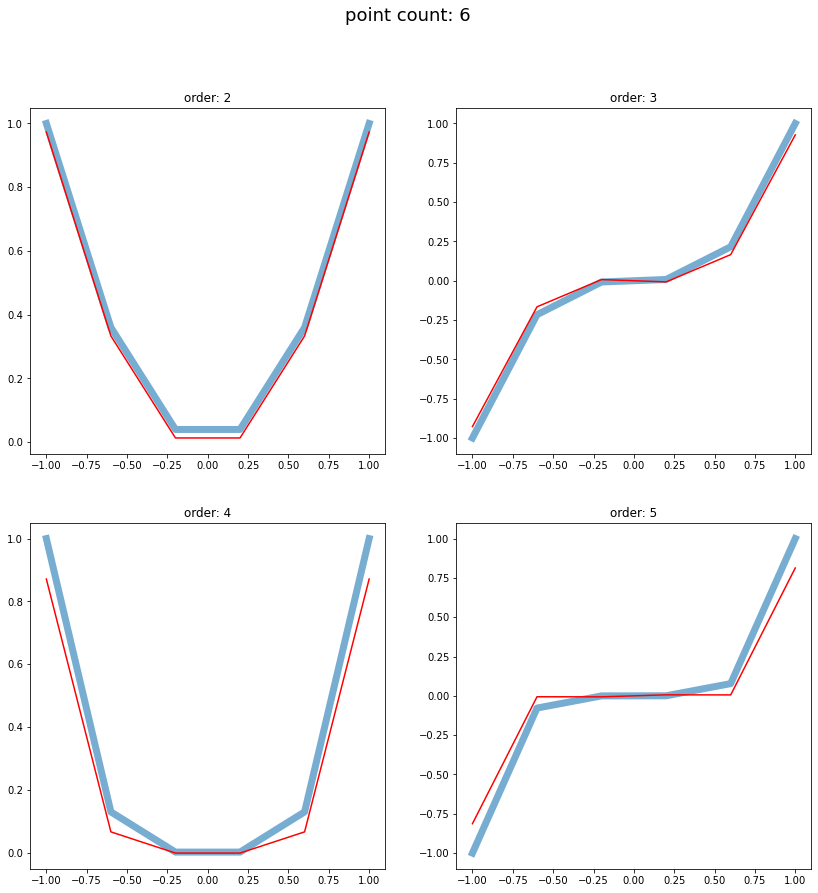

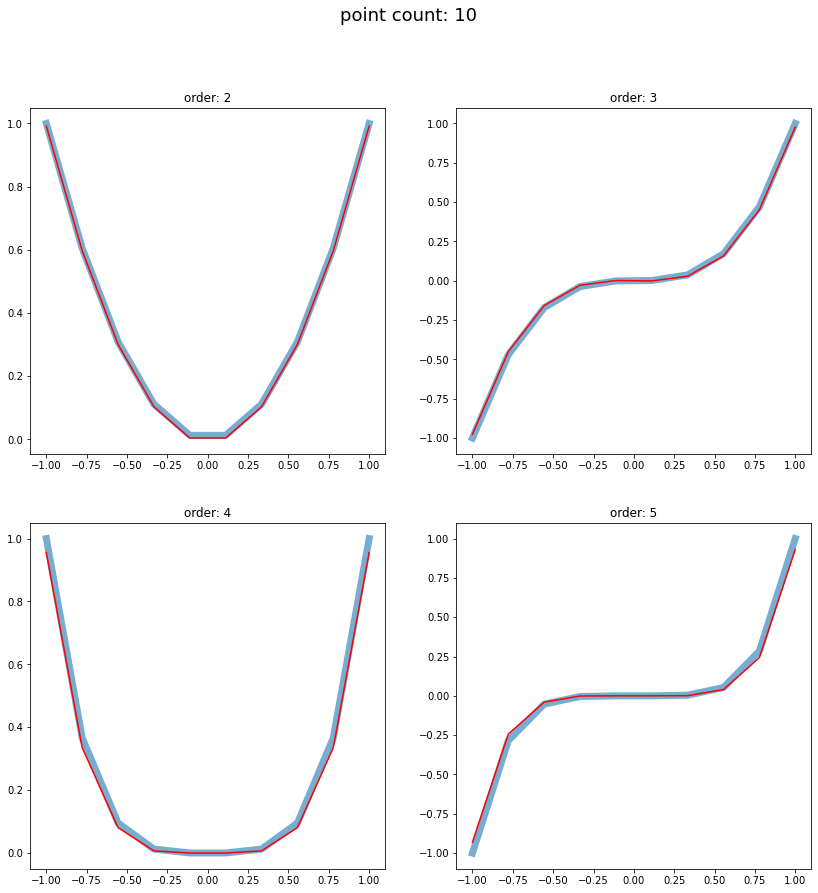

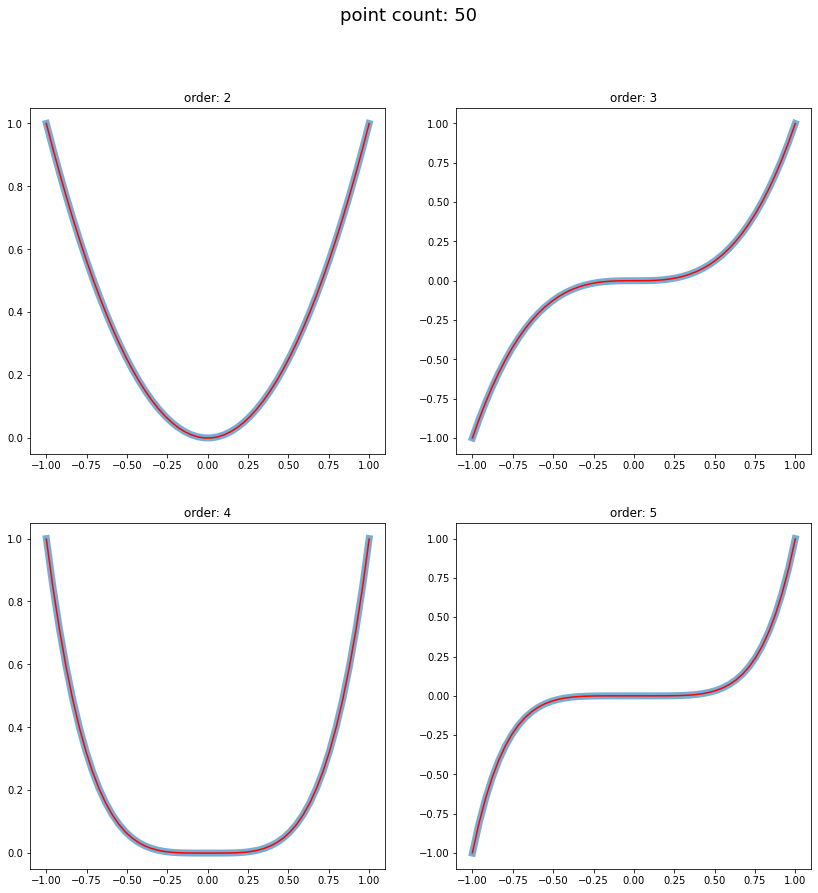

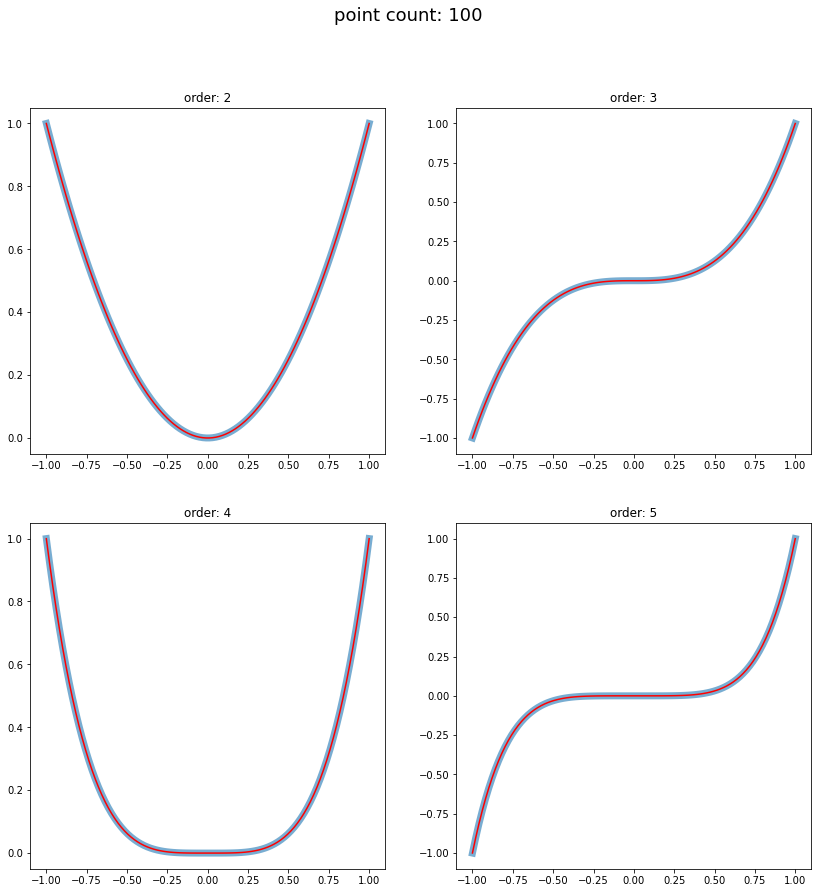

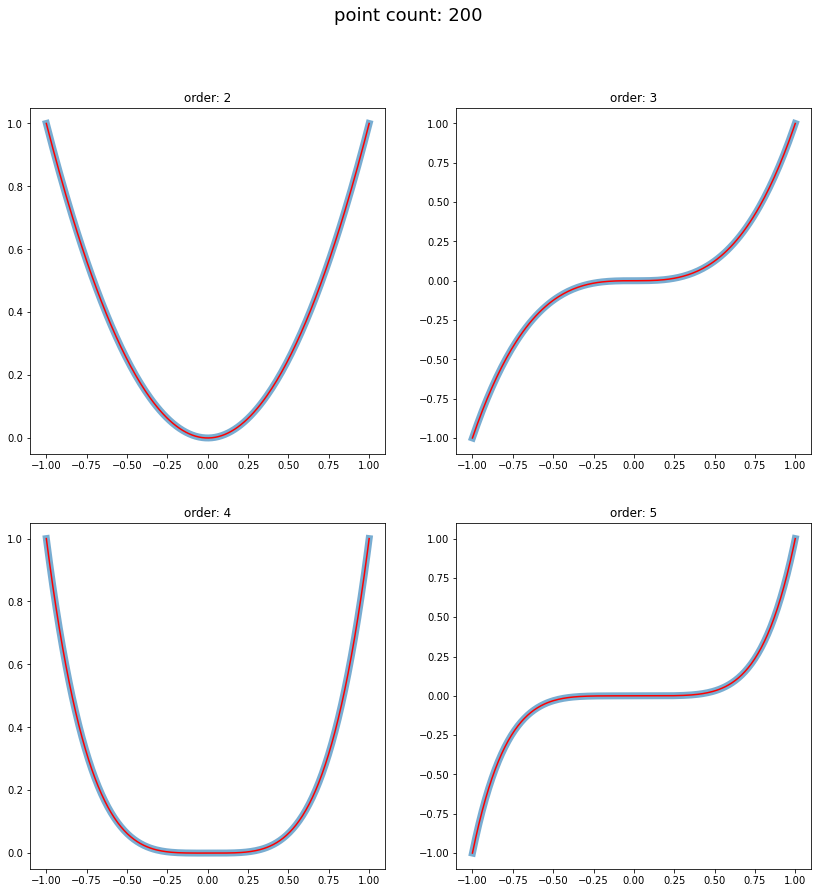

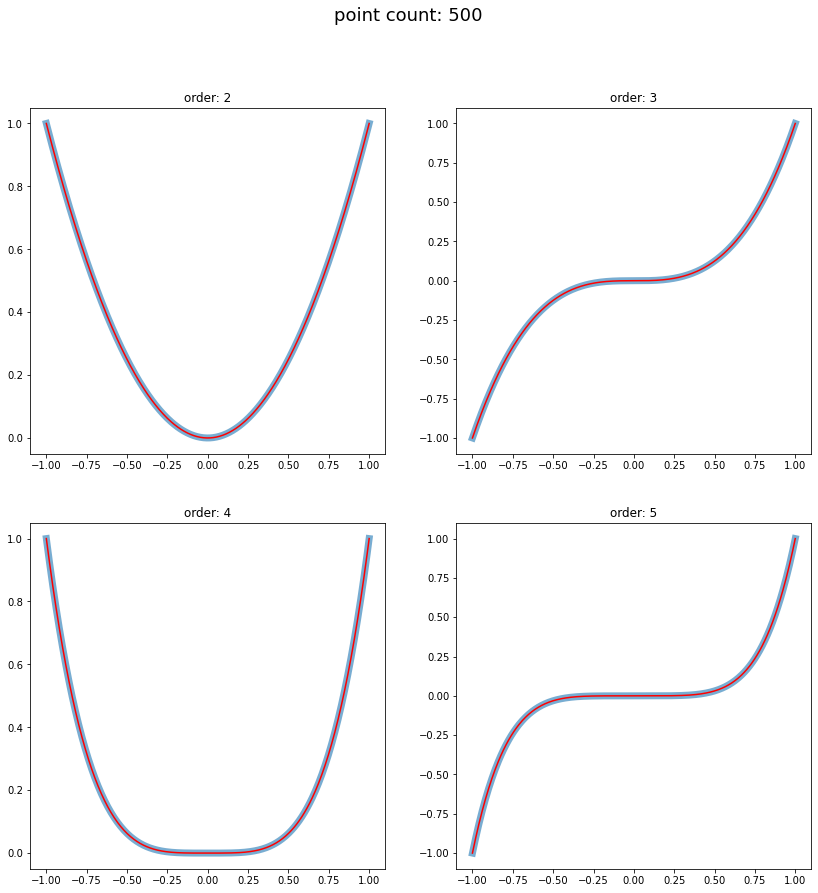

In [164]:
def polynomial(n):
    
    def f(x):
        return x**n
    
    return f

point_count_list = [6, 10, 50 ,100, 200, 500]
total_error = []
total_error_trap = []
for point_count in point_count_list:
    fig, axs = plt.subplots(2, 2, figsize=(14,14))
    convergence = []
    convergence_trap = []
    for order, ax in zip([2, 3, 4, 5], axs.reshape(-1)):
        
        points = np.linspace(-1,1, point_count)
        f = polynomial(order)

        # exact solution
        y = f(points)

        # projection solution
        alpha = solve_system(f, points, trap=False)
        alpha_trap = solve_system(f, points, trap=True)

        ax.plot(points, y, linewidth=7, alpha=0.6)
        ax.plot(points, alpha,'r')
        ax.set_title(f'order: {order}')
        error = np.sum(np.abs(alpha-y))
        error_trap = np.sum(np.abs(alpha_trap-y))
        convergence_trap.append(error_trap)
        convergence.append(error)
        
    total_error.append(np.mean(np.array(convergence)))
    total_error_trap.append(np.mean(np.array(convergence_trap)))
    fig.suptitle(f'point count: {point_count}', fontsize=18)
    plt.show()


The total error is calculated as the average difference between the approximated and exact solutions over each plot in each point for every point count. 

$$L_{\text{point_count}} = \sum_{i=0}^\text{point_count} |\text{exact}_i - \alpha_i|$$

The plot below illustrates how the mean error decreases as the step count increases, comparing the two integration methods.

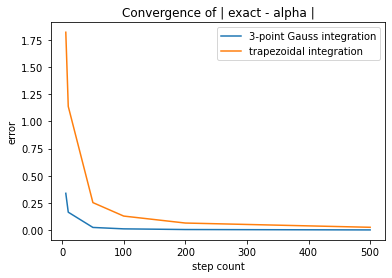

In [165]:
plt.title(f'Convergence of | exact - alpha |')
plt.ylabel('error')
plt.xlabel('step count')
plt.plot(point_count_list, total_error, label='3-point Gauss integration')
plt.plot(point_count_list, total_error_trap, label='trapezoidal integration')
plt.legend()
plt.show()

# **Discussion**

The implemented Gauss quadrature rules over the unit interval and a triangle returned results as expected - comparing against polynomials of an appropriate order for whom the methods were derived the residuals were either zero or very small corresponding to a round-off error.

The Monte Carlo integration also returned the expected results - the convergence rate on average follows the $\frac{1}{\sqrt{n}}$ curve as indicated by the visual graph. But it has to be noted that the testing was done only with third order polynomials.

Considering the approximation, the convergence plots clearly indicate that the 3-point Gauss quadrature integration achieves convergence for much coarser mesh than when using the trapezoidal rule, which was expected. But still for very small amount of elements the first and last points were a bit off, as can be seen in the plots.
